# Coding Temple's Data Analytics Program:
---
## Python for DA: Machine Learning Assignment

For your assignment today, you will look through the [UCI Irvine ML Repository](https://archive.ics.uci.edu/datasets) to find a dataset that you can build a model on. Your workflow should look something like:

- Import any necessary libraries
- Load in the data
- Clean/Tidy the Data
- Explore the data:
    - Gather all summary statistics
    - Visualize your data and your target
    - Identify any relationships between your target and the feature matrix
    - Loop back through and continue cleaning data/feature engineering as needed
- Split the data
- Establish a baseline model
- Create model
- Establish model accuracy
- Hypertune your model
- Communicate your results

The model, data, and methods you use are all completely up to you for this assignment! Ensure you label your notebook with markdown cells and proper comments

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor

In [23]:
boat_df = pd.read_csv('data/yacht_hydrodynamics.csv', header=None)
boat_df.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


#### Dataset Information
I chose this because I'm into boats and am curious about hull dynamics since I have a semi-displacement boat that is slow and inefficient at present.

###### Additional information on this particular data set
Prediction of residuary resistance of sailing yachts at the initial design stage is of a great value for evaluating the ship's performance and for estimating the required propulsive power. Essential inputs include the basic hull dimensions and the boat velocity. 

The Delft data set comprises 308 full-scale experiments, which were performed at the Delft Ship Hydromechanics Laboratory for that purpose. 
These experiments include 22 different hull forms

Variations concern hull geometry coefficients and the Froude number:

1. Longitudinal position of the center of buoyancy, adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam-draught ratio, adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional.   <a href="https://en.wikipedia.org/wiki/Froude_number">Wikipedia Detail</a>

The measured variable is the residuary resistance per unit weight of displacement:
<br>7. Residuary resistance per unit weight of displacement, adimensional.

In [49]:
cols = ['long_cb','prism_coef','len_displ_rat','beam_draw_rat','len_beam_rat','frounde_num','resid_resist']
boat_df.rename(columns=dict(zip(boat_df.columns, cols)), inplace=True)
boat_df

,long_cb,prism_coef,len_displ_rat,beam_draw_rat,len_beam_rat,frounde_num,resid_resist
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [50]:
boat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   long_cb        308 non-null    float64
 1   prism_coef     308 non-null    float64
 2   len_displ_rat  308 non-null    float64
 3   beam_draw_rat  308 non-null    float64
 4   len_beam_rat   308 non-null    float64
 5   frounde_num    308 non-null    float64
 6   resid_resist   308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


In [51]:
boat_df.describe().round(2)

,long_cb,prism_coef,len_displ_rat,beam_draw_rat,len_beam_rat,frounde_num,resid_resist
count,308.00,308.00,308.00,308.00,308.00,308.00,308.00
mean,-2.38,0.56,4.79,3.94,3.21,0.29,10.50
std,1.51,0.02,0.25,0.55,0.25,0.10,15.16
min,-5.00,0.53,4.34,2.81,2.73,0.12,0.01
25%,-2.40,0.55,4.77,3.75,3.15,0.20,0.78
50%,-2.30,0.56,4.78,3.96,3.15,0.29,3.06
75%,-2.30,0.57,5.10,4.17,3.51,0.38,12.82
max,0.00,0.60,5.14,5.35,3.64,0.45,62.42


In [52]:
corr = boat_df.corr()
corr

,long_cb,prism_coef,len_displ_rat,beam_draw_rat,len_beam_rat,frounde_num,resid_resist
long_cb,1.000000e+00,-8.610666e-03,-2.674076e-03,2.928595e-03,-3.369351e-03,-3.514317e-18,0.019306
prism_coef,-8.610666e-03,1.000000e+00,-4.631607e-02,3.394618e-01,-8.669450e-02,2.908271e-16,-0.028569
len_displ_rat,-2.674076e-03,-4.631607e-02,1.000000e+00,3.768233e-01,6.763646e-01,1.769663e-16,-0.002967
beam_draw_rat,2.928595e-03,3.394618e-01,3.768233e-01,1.000000e+00,-3.802223e-01,-4.207099e-17,-0.012421
len_beam_rat,-3.369351e-03,-8.669450e-02,6.763646e-01,-3.802223e-01,1.000000e+00,-1.300148e-16,-0.001025
frounde_num,-3.514317e-18,2.908271e-16,1.769663e-16,-4.207099e-17,-1.300148e-16,1.000000e+00,0.810092
resid_resist,1.930617e-02,-2.856912e-02,-2.967365e-03,-1.242113e-02,-1.025470e-03,8.100922e-01,1.000000


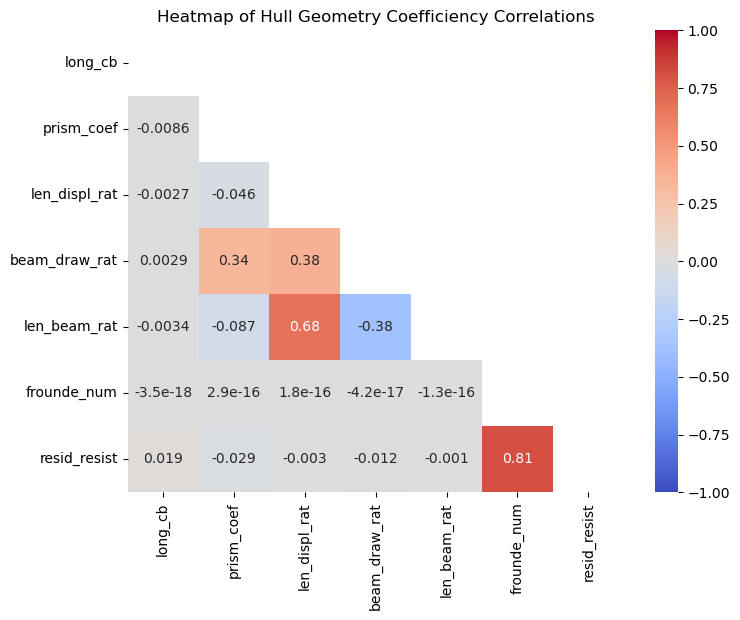

In [53]:
plt.figure(figsize=(8,6))
mask = np.zeros_like(corr)  # fills with zeros
mask[np.triu_indices_from(mask)] = True 
plt.title('Heatmap of Hull Geometry Coefficiency Correlations')
sns.heatmap(corr, vmin=-1, vmax=1,cmap='coolwarm', annot=True, mask=mask);

### Modelling

In [78]:
# split the data into X and y
X = boat_df.drop(columns = 'resid_resist')
y = boat_df['resid_resist']

In [79]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [80]:
# shapes - this will be useful in debugging
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (246, 6)
y_train shape (246,)
X_test shape (62, 6)
y_test shape (62,)


#### Linear Regression Model

In [81]:
# instantiate the model
lr = LinearRegression()

In [82]:
# fit it to training set
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
# this is the training score r squared
lr.score(X_train, y_train)

0.6675349731715721

In [84]:
# this is the testing score
lr.score(X_test,y_test)

0.5450299966509137

In [85]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(0, len(X.columns))]

['long_cb: 0.39522657955873886',
 'prism_coef: -10.618927924896717',
 'len_displ_rat: -0.18656409416596098',
 'beam_draw_rat: -0.1850413817129919',
 'len_beam_rat: -0.2872238834417864',
 'frounde_num: 126.47661323522807']

##### Initial conclusion
Prediction is only marginally good.  The Frounde number is so tiny in units that any increase will have a large increase in residual resistance.  Longitudinal center of buoyancy is a factor in resistance (fore & aft buoyancy).  Hull resistance will go down as the length to beam ratio rises which makes sense.  Fat, wide boats have huge resitance compared to long, skinny ones.  Similar to length to displacement (weight).  Heavy boats have high resistance.  This number is equal almost to beam to draft ratio because the heavier a boat, the more it draws (draft) in the water.  Prismatic coefficient and Frounde number are two variables that I'll have to read up on for hull dynamics to be able to discuss at greater length.

#### Decision Tree Model

In [86]:
# Instantiate the model
dt = DecisionTreeRegressor(random_state=42)

In [87]:
# fit it to training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [88]:
# this is the training score r squared
dt.score(X_train, y_train)

1.0

In [89]:
# this is the testing score
dt.score(X_test,y_test)

0.9980429627678116

#### Random Forest Model

In [93]:
# Instantiate the model
rf = RandomForestRegressor(random_state=42)

In [94]:
# fit it to training set
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
# this is the training score r squared
rf.score(X_train, y_train)

0.9992137538081247

In [96]:
# this is the testing score
rf.score(X_test,y_test)

0.9980056117304059

#### XGBoost Model

In [98]:
# instantiate the model
xg = XGBRegressor(random_state=42)

In [99]:
# fit it to training set
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
# this is the training score r squared
xg.score(X_train, y_train)

0.9999998656255678

In [101]:
# this is the testing score
xg.score(X_test,y_test)

0.9979818563019648

In [ ]:
print("Baseline scores")
print(r2_score(y_train, baseline))
print('---------------------------------')
print('Linear Model Scores')
print(r2_score(y_train, lr.predict(X_train)))
print(r2_score(y_test, lr.predict(X_test)))
print('---------------------------------')
print('Decision Tree Score')
print(r2_score(y_train, dt.predict(X_train)))
print(r2_score(y_test, dt.predict(X_test)))
print('---------------------------------')
print('Random Forest Score')
print(r2_score(y_train, rf.predict(X_train)))
print(r2_score(y_test, rf.predict(X_test)))
print('---------------------------------')
print('XG Boost Score')
print(r2_score(y_train, xg.predict(X_train)))
print(r2_score(y_test, xg.predict(X_test)))

## Final Conclusion

Ultimately the linear regression model was the least successful.  My supposition is that the relationship of hull residual resistance to the coefficients is <b><u>not linear</u></b>.  Because of this, other models that do not rely on a linear relationship were far better suited to predict future values given the training set of data.

Although it's a coin toss between decision tree, random forest, and XGBoost, the decision tree yielded the most accurate predictions.